<a href="https://colab.research.google.com/github/anasshamoon12002/data-mining-2023-24/blob/main/Clustering_Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project, a.y. 2023-2024
## Salvatore Correnti, Jonathan Ato Markin, Anas Shamoon
## Hierarchical Clustering Notebook

# Preliminary
These cells are for running the notebook with `Google Colab` using a `Google Drive` storage for the project repository.They can be skipped if data is available locally.

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')
%cd "drive/MyDrive/Colab Notebooks/data-mining-2023-24"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/data-mining-2023-24


## Hierarchical Clustering

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the dataset
df_clustering_data = pd.read_csv('data/df_incidents_poverty_house_data_preparation_final.csv')

In [5]:
df_clustering_data.head()

,state,city_or_county,latitude,longitude,avg_age_participants,datetime,males_ratio,state_congressional_district,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio
0,Indiana,Indianapolis,39.8322,-86.2492,19.0,2015-05-02,1.0,indiana_7,12.3,0.000000,1.000000,0.0,0.547323,0.009434,0.000000,0.032258,0.0
1,Missouri,Kansas City (Raytown),38.9647,-94.4654,29.0,2016-12-21,1.0,missouri_5,11.9,0.000000,0.000000,0.0,0.588294,0.014925,0.000000,0.000000,0.0
2,California,Hesperia,34.3904,-117.3770,19.0,2018-01-06,1.0,california_8,11.0,1.000000,0.000000,0.0,0.599672,0.047619,0.200000,0.000000,0.0
3,Illinois,Chicago,41.8895,-87.7507,36.0,2016-07-08,1.0,illinois_7,10.9,0.333333,0.666667,0.0,0.842395,0.006726,0.016393,0.005495,0.0
4,Illinois,Chicago,41.7394,-87.6656,16.0,2014-04-19,1.0,illinois_1,12.2,0.000000,1.000000,0.0,0.730881,0.004255,0.000000,0.005348,0.0


In [6]:
print('Shape of Dataset: ',df_clustering_data.shape)

Shape of Dataset:  (92561, 17)


In [7]:
# Filter data for a specific state (e.g., Alabama)
selected_state = 'alabama'
df_selected_state = df_clustering_data[df_clustering_data['state_congressional_district'].str.startswith(selected_state)]

In [8]:
# Extract features
features_selected_state = df_selected_state[['latitude', 'longitude', 'avg_age_participants', 'males_ratio', 'povertyPercentage',
                                             'killed_ratio', 'injured_ratio', 'unharmed_ratio', 'candidate_winning_ratio',
                                             'males_in_month_ratio', 'killed_in_month_ratio',
                                             'injured_in_month_ratio', 'unharmed_in_month_ratio']]

In [9]:
# Standardize the features
scaler_selected_state = StandardScaler()
features_standardized_selected_state = scaler_selected_state.fit_transform(features_selected_state)

## Agglomerative Hierarchical Clustering

In [10]:
# Perform hierarchical clustering using different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

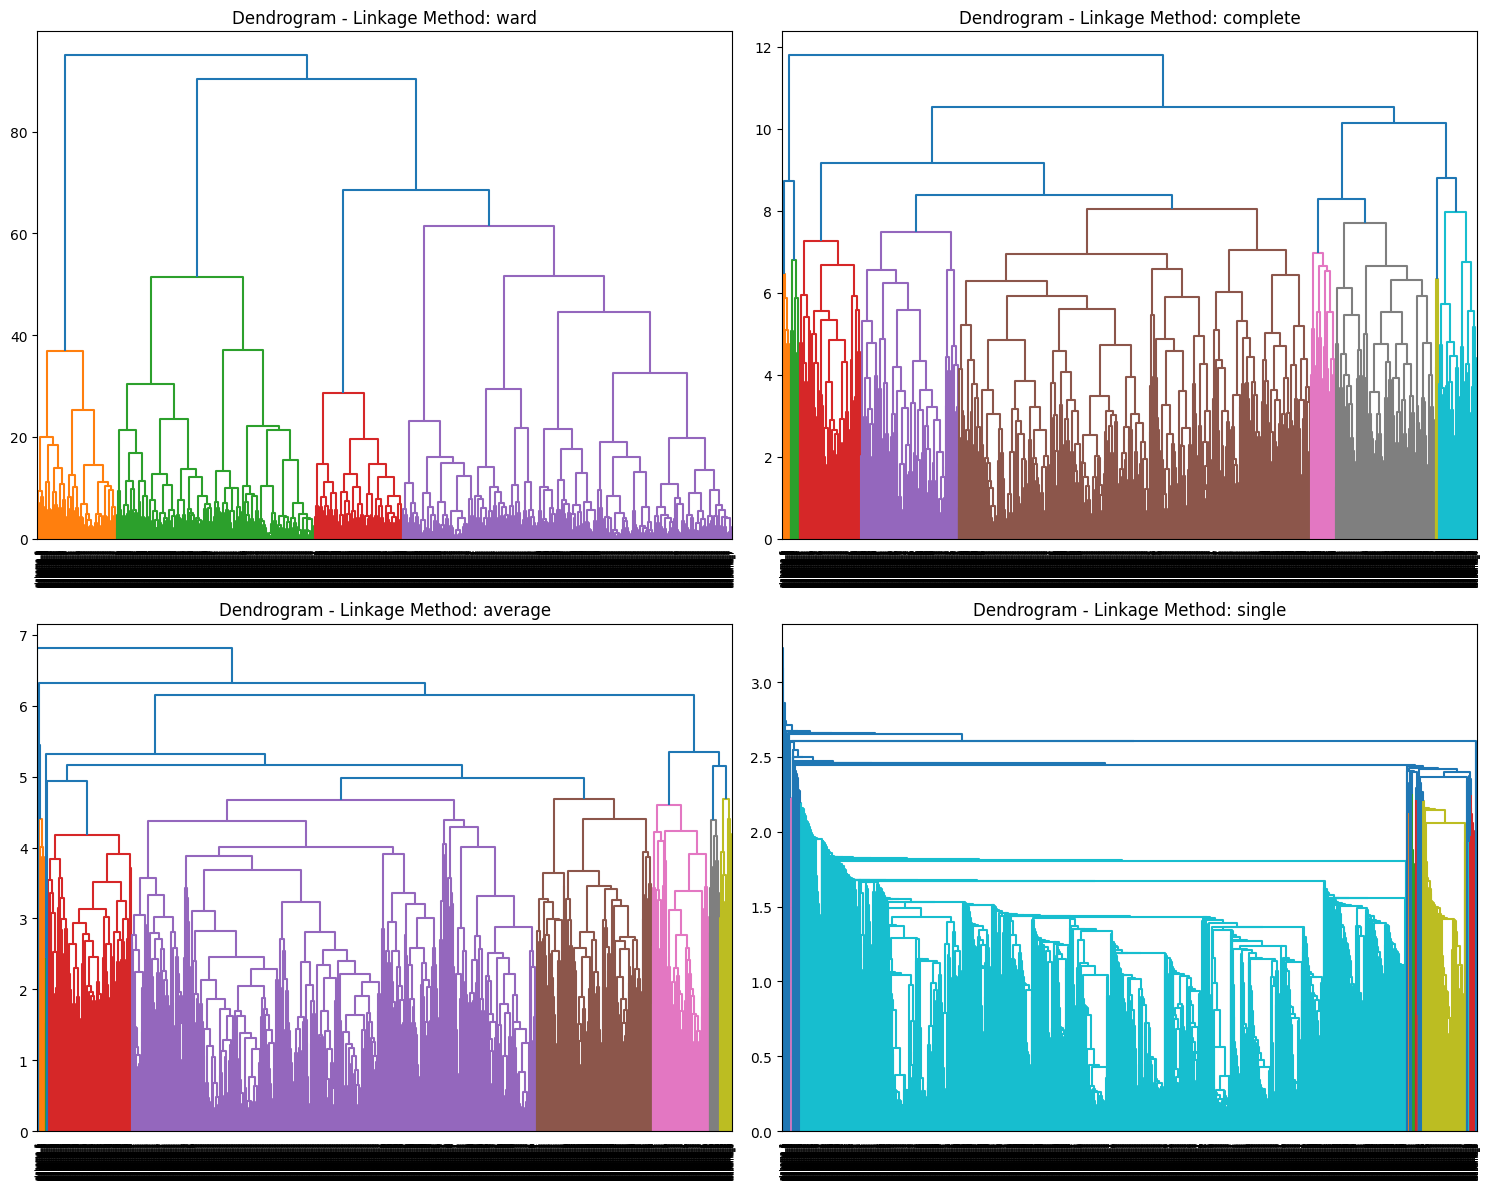

In [11]:
# Create subplots for each linkage method
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, method in enumerate(linkage_methods):
    # Calculate linkage matrix
    Z = linkage(features_standardized_selected_state, method=method)

    # Plot dendrogram
    dendrogram(Z, labels=df_selected_state['state_congressional_district'].tolist(), ax=axes[i//2, i%2], orientation='top')
    axes[i//2, i%2].set_title(f'Dendrogram - Linkage Method: {method}')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster

# Function to perform hierarchical clustering and evaluate
def hierarchical_clustering_evaluation(data, linkage_method, num_clusters=5):
    # Calculate linkage matrix
    Z = linkage(data, method=linkage_method)

    # Perform hierarchical clustering
    labels = fcluster(Z, t=num_clusters, criterion='maxclust') # t: number of clusters

    # Evaluate clustering results
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)

    return labels, silhouette, calinski_harabasz

MIN_CLUSTERS = 2
MAX_CLUSTERS = 6

# Evaluate clustering for each linkage method
evaluation_results = [{} for _ in range(MAX_CLUSTERS+1)]

for num_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
  for method in linkage_methods:
      labels, silhouette, calinski_harabasz = hierarchical_clustering_evaluation(features_standardized_selected_state, method, num_clusters=num_clusters)

      # Store results
      evaluation_results[num_clusters][method] = {'labels': labels, 'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz}

  print(f'NUM_CLUSTERS = {num_clusters}')
  # Print evaluation results
  for method, results in evaluation_results[num_clusters].items():
      print(f"Linkage Method: {method}")
      print(f"Silhouette Score: {results['silhouette']:.3f}")
      print(f"Calinski-Harabasz Score: {results['calinski_harabasz']:.3f}")
      print("-----------------------------")
  print("-----------------------------")

NUM_CLUSTERS = 2
Linkage Method: ward
Silhouette Score: 0.264
Calinski-Harabasz Score: 402.719
-----------------------------
Linkage Method: complete
Silhouette Score: 0.348
Calinski-Harabasz Score: 163.555
-----------------------------
Linkage Method: average
Silhouette Score: 0.267
Calinski-Harabasz Score: 2.668
-----------------------------
Linkage Method: single
Silhouette Score: 0.199
Calinski-Harabasz Score: 1.978
-----------------------------
-----------------------------
NUM_CLUSTERS = 3
Linkage Method: ward
Silhouette Score: 0.186
Calinski-Harabasz Score: 449.863
-----------------------------
Linkage Method: complete
Silhouette Score: 0.139
Calinski-Harabasz Score: 213.882
-----------------------------
Linkage Method: average
Silhouette Score: 0.193
Calinski-Harabasz Score: 24.141
-----------------------------
Linkage Method: single
Silhouette Score: 0.158
Calinski-Harabasz Score: 2.026
-----------------------------
-----------------------------
NUM_CLUSTERS = 4
Linkage Method

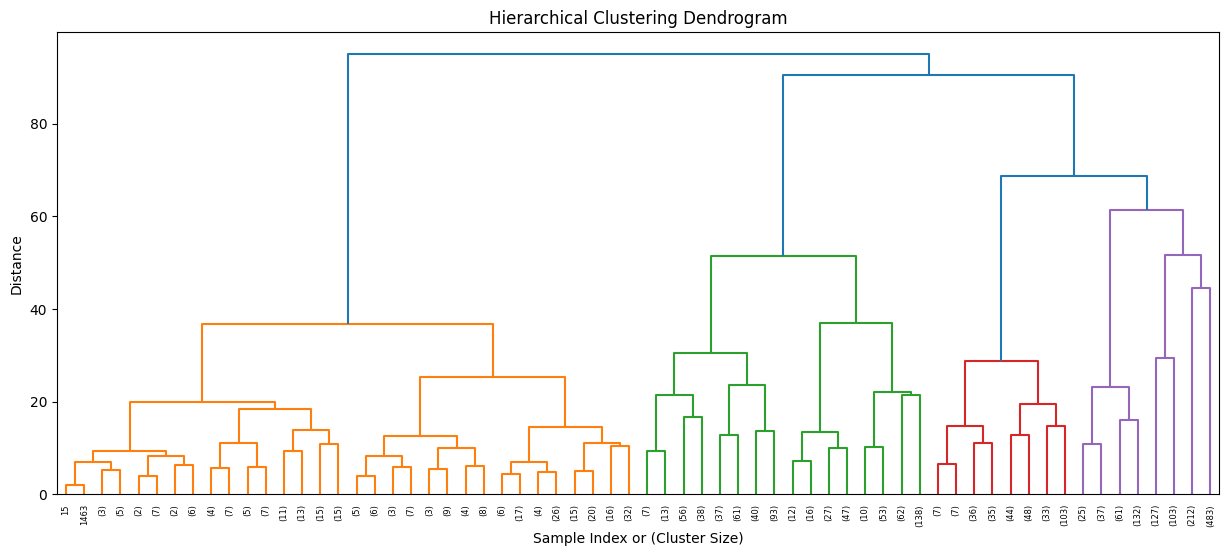

In [13]:
# Perform hierarchical clustering
linkage_matrix = linkage(features_standardized_selected_state, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, p=5, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

In [14]:
# Cut the dendrogram to get k clusters
k = 5
labels = fcluster(linkage_matrix, k, criterion='maxclust')

In [15]:
# Convert labels to integers
labels = labels.astype(int)

In [16]:
# Add the cluster labels to the dataframe
features_standardized_selected_state = pd.DataFrame(features_standardized_selected_state, columns=features_selected_state.columns)
df_clustered = features_standardized_selected_state.copy()
df_clustered['Cluster'] = labels

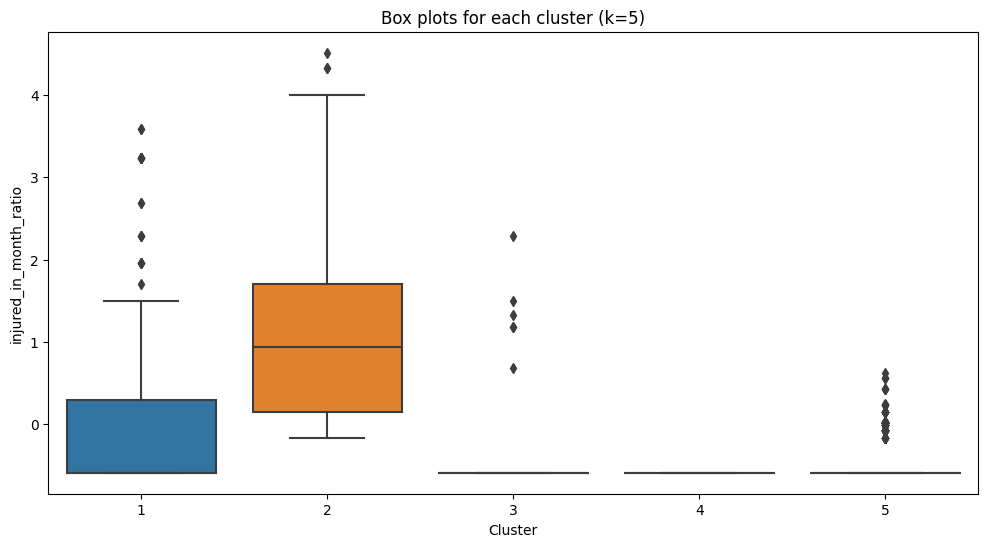

In [17]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='injured_in_month_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

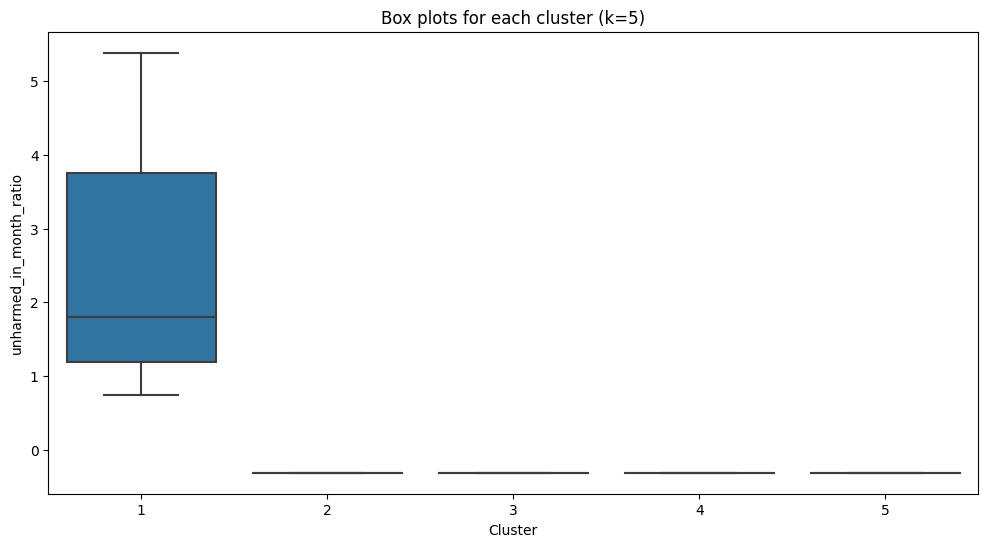

In [18]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='unharmed_in_month_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

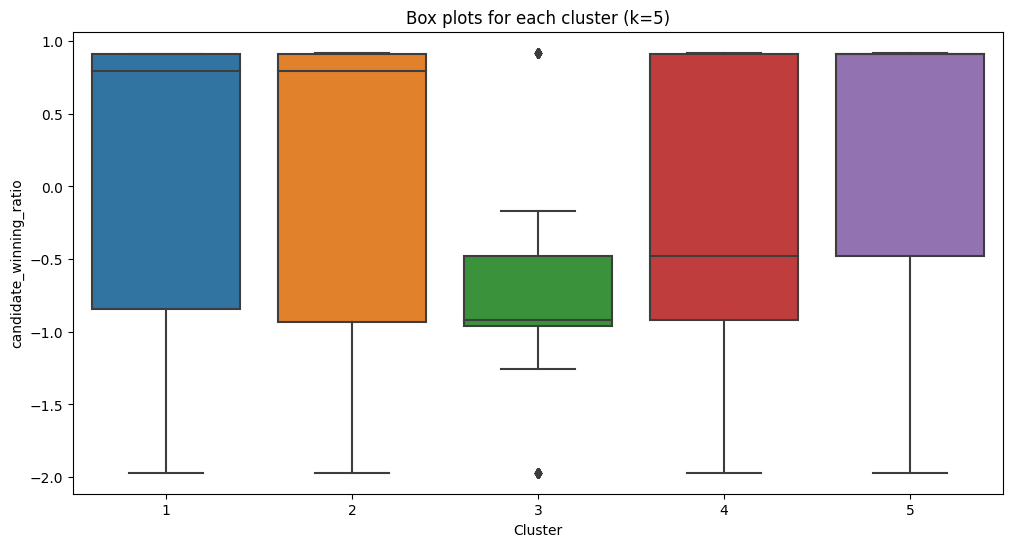

In [19]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='candidate_winning_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

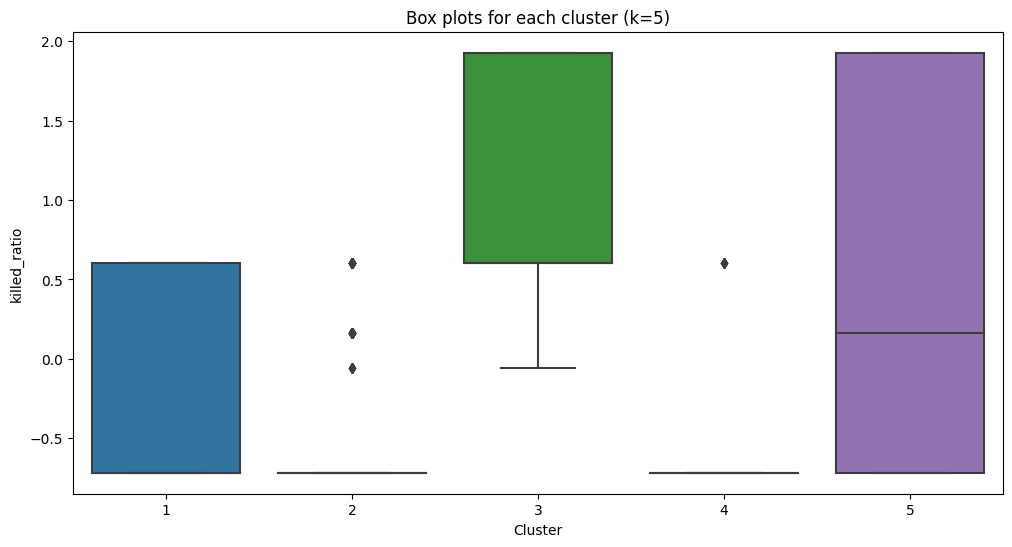

In [20]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='killed_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

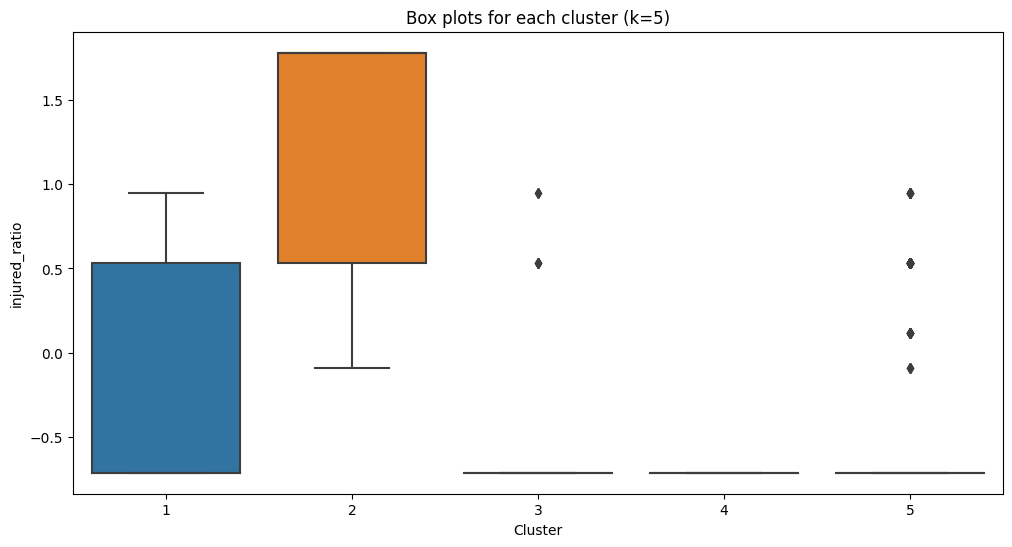

In [21]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='injured_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

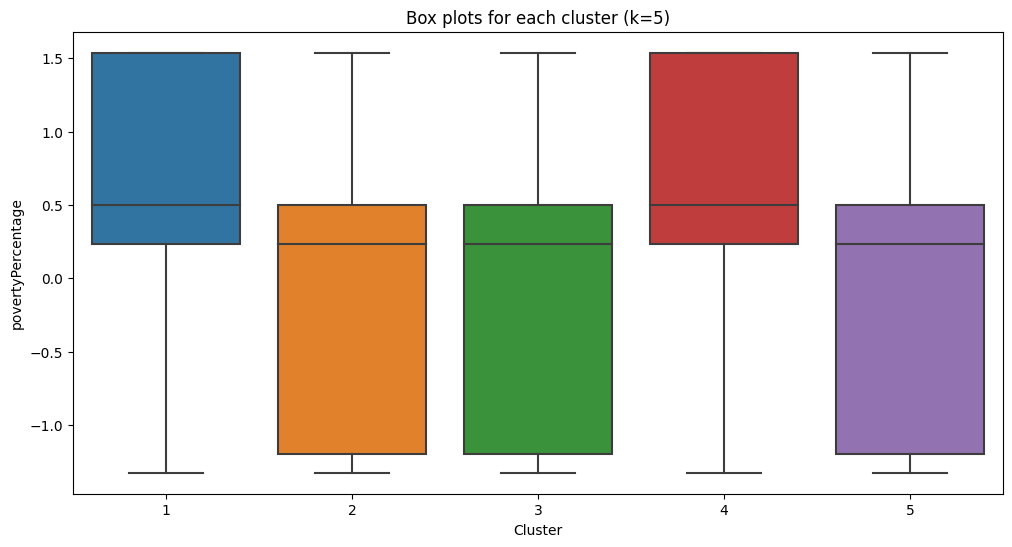

In [22]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='povertyPercentage', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

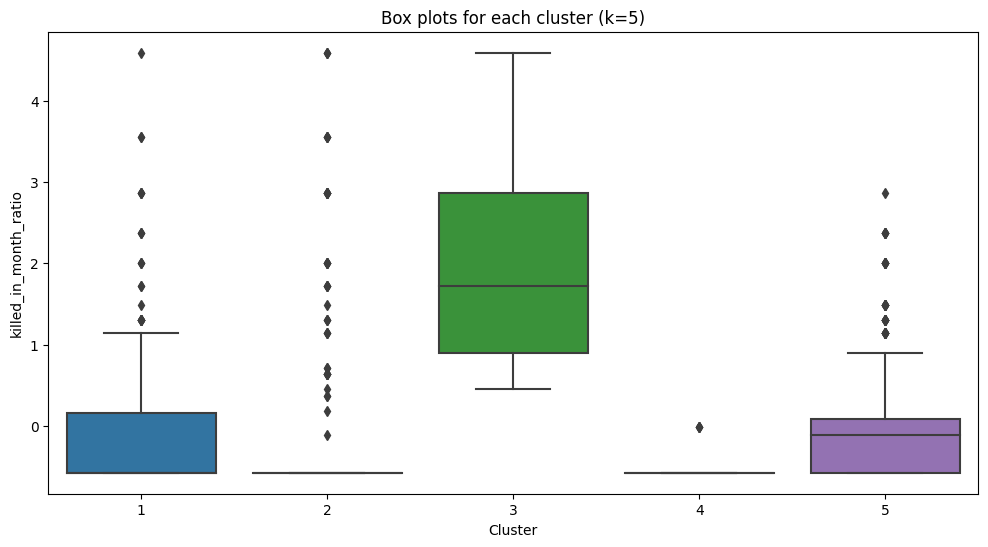

In [23]:
# Plot box plots for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='killed_in_month_ratio', data=df_clustered)
plt.title(f'Box plots for each cluster (k={k})')
plt.show()

## Experimeting with Pyclustering

In [24]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395103 sha256=b1e79ea0535a118a006e59ddb605c3e5c9beb46e31575b043d7e8ec848280bfd
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [25]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.agglomerative import agglomerative, type_link

In [26]:
# Create an agglomerative clustering instance
agglomerative_instance = agglomerative(features_standardized_selected_state.values.tolist(), 5, type_link.COMPLETE_LINK)

In [27]:
# Run the clustering algorithm
agglomerative_instance.process()

In [28]:
# Get the clusters and other information
clusters = agglomerative_instance.get_clusters()
print(clusters)

[[0, 1508, 230, 429, 535, 2006, 2028, 1742, 1145, 758, 1, 212, 1078, 13, 1607, 2235, 866, 1192, 457, 2209, 1502, 2473, 574, 2100, 428, 972, 1533, 1678, 662, 1035, 731, 1795, 998, 2212, 1188, 1266, 942, 50, 1865, 851, 766, 305, 54, 1590, 1660, 2286, 103, 2244, 782, 918, 2164, 2184, 1804, 2105, 1929, 798, 2053, 1523, 815, 1568, 2133, 70, 2459, 491, 511, 1369, 1648, 205, 1882, 699, 1580, 458, 2151, 259, 1223, 202, 1353, 1786, 1803, 1993, 362, 887, 375, 1135, 395, 1228, 1295, 400, 570, 2175, 2485, 659, 1537, 720, 1876, 1296, 1410, 1552, 704, 1811, 932, 2099, 1337, 717, 1344, 1343, 2265, 804, 2054, 10, 952, 95, 862, 1046, 1823, 1511, 128, 2376, 2469, 100, 754, 905, 1326, 182, 2243, 2368, 123, 1800, 1848, 246, 814, 1878, 157, 1754, 893, 2125, 1413, 1005, 777, 2267, 2202, 146, 1526, 2348, 326, 716, 1299, 1495, 839, 166, 1437, 576, 846, 2306, 1470, 2247, 1908, 148, 668, 1452, 1584, 314, 1597, 1768, 2158, 24, 227, 638, 1696, 35, 233, 675, 612, 975, 1294, 1729, 6, 2189, 90, 2188, 2048, 1183, 160

In [29]:
# Flatten the list of clusters for easier indexing
flat_clusters = [idx for idx, cluster in enumerate(clusters) for _ in cluster]

In [30]:
[len(cluster) for cluster in clusters]

[1611, 63, 446, 221, 147]

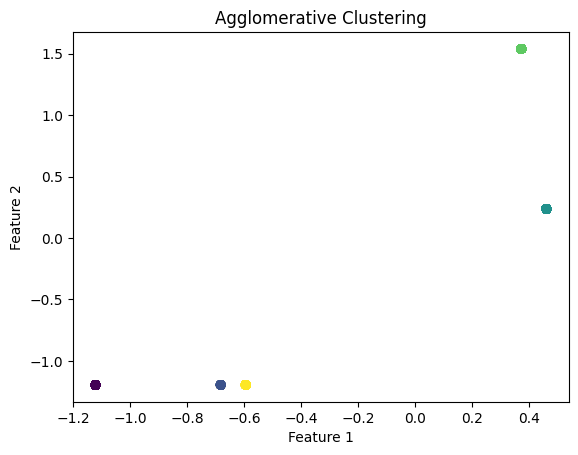

In [31]:
# Plot the clusters
import numpy as np

plt.scatter(features_standardized_selected_state.iloc[flat_clusters, 2],  # X-axis, can be adjusted as needed
            features_standardized_selected_state.iloc[flat_clusters, 4],  # Y-axis, can be adjusted as needed
            c=np.repeat(range(len(clusters)), [len(cluster) for cluster in clusters]), cmap='viridis')

plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()